In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# plt.rcParams['xtick.labelbottom']=True
# plt.rcParams['ytick.labelleft']=True

In [2]:
df=pd.read_csv('data/lc_2016_2017.csv')
df=df.drop(['desc'], axis=1)
# df=df.dropna()
# len(df)
num_cols=[each_col for each_col in df.columns if df[each_col].dtype!='O']
cat_cols=[each_col for each_col in df.columns if df[each_col].dtype=='O']

/Users/kevinlee/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18,54) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
rand_cols=np.random.choice(df.columns, size=12, replace=False)

In [4]:
sample_df=df.sample(100)

### Histograms

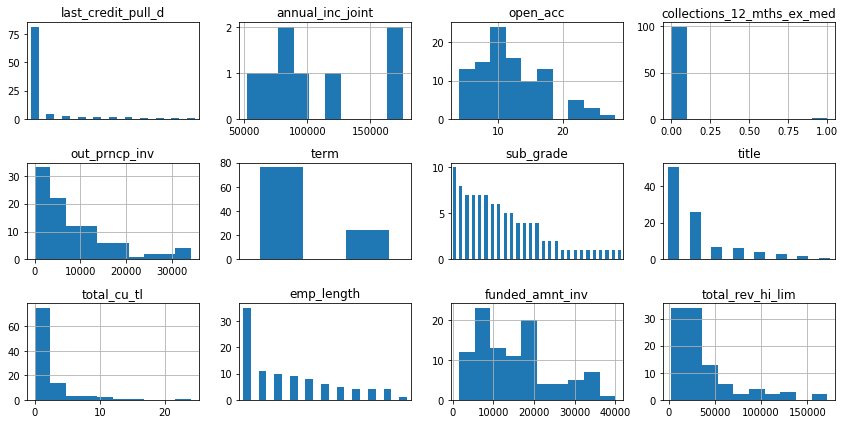

In [ ]:
columns=rand_cols
col_num=4
row_num=math.ceil(len(columns)/col_num)
fig, ax=plt.subplots(row_num, col_num, figsize=(3*col_num, 2*row_num))
if row_num == 1: 
    ax=[ax]
for idx, each_col in enumerate(columns): 
    row_idx=idx//col_num
    col_idx=idx%col_num
    if sample_df[each_col].dtype=='O': 
        sample_df[each_col].value_counts().plot(kind='bar', ax=ax[row_idx][col_idx])
        ax[row_idx][col_idx].set_xticks([])
    else: 
        sample_df[each_col].hist(ax=ax[row_idx][col_idx])
    ax[row_idx][col_idx].set_title(each_col)
plt.tight_layout()

### Scatter Plots

In [ ]:
rand_num_cols=np.random.choice(num_cols, size=6)

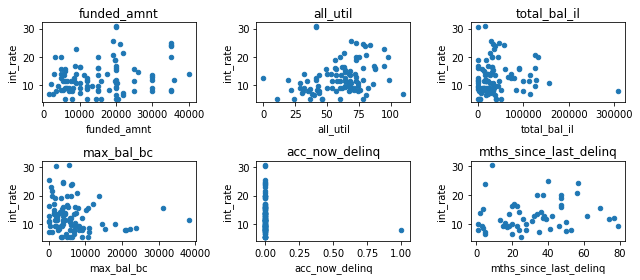

In [ ]:
columns=rand_num_cols
target='int_rate'
col_num=3
row_num=math.ceil(len(columns)/col_num)
fig, ax=plt.subplots(row_num, col_num, figsize=(3*col_num, 2*row_num))
if row_num == 1: 
    ax=[ax]
for idx, each_col in enumerate(columns): 
    row_idx=idx//col_num
    col_idx=idx%col_num
    sample_df[[each_col, target]].plot(kind='scatter', x=each_col, y=target, ax=ax[row_idx][col_idx])
    ax[row_idx][col_idx].set_title(each_col)
plt.tight_layout()

### Histograms

In [ ]:
test='hi'

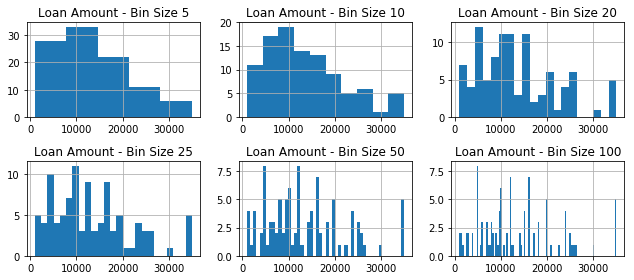

In [11]:
# bins=[5000, 10000, 25000, 50000]
bins=[5, 10, 20, 25, 50, 100]
col_num=3
row_num=math.ceil(len(bins)/col_num)
fig, ax=plt.subplots(row_num, col_num, figsize=(3*col_num, 2*row_num))
if row_num == 1: 
    ax=[ax]
for idx, bin_size in enumerate(bins): 
    row_idx=idx//col_num
    col_idx=idx%col_num
    sample_df['loan_amnt'].hist(bins=bin_size, ax=ax[row_idx][col_idx])
    ax[row_idx][col_idx].set_title(f'Loan Amount - Bin Size {bin_size}')
plt.tight_layout()

In [13]:
sample_df.corr().style.background_gradient()

/Users/kevinlee/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/Users/kevinlee/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/Users/kevinlee/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


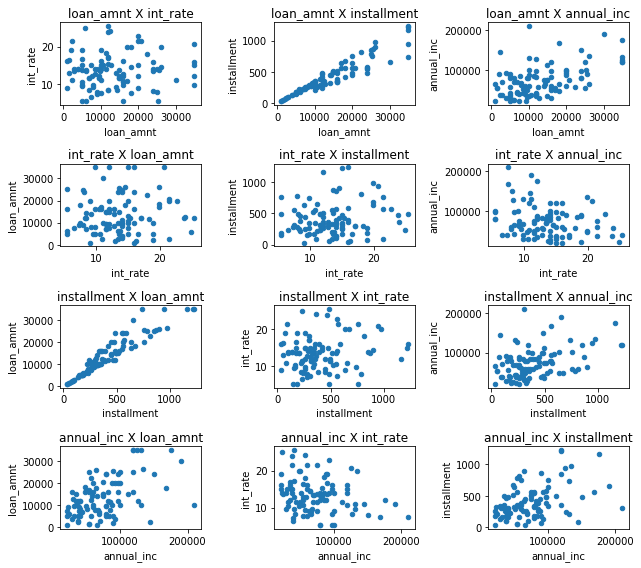

In [70]:
import itertools
columns=['loan_amnt', 'int_rate', 'installment', 'annual_inc']
x_y=[(x, y) for (x, y) in itertools.product(columns, columns) if x!=y]

col_num=len(columns)-1
row_num=math.ceil(len(x_y)/col_num)
fig, ax=plt.subplots(row_num, col_num, figsize=(3*col_num, 2*row_num))
if row_num == 1: 
    ax=[ax]
for idx, (x, y) in enumerate(x_y): 
    row_idx=idx//col_num
    col_idx=idx%col_num
    sample_df[[x, y]].plot(kind='scatter', x=x, y=y, ax=ax[row_idx][col_idx])
    ax[row_idx][col_idx].set_title(f'{x} X {y}')
plt.tight_layout()